In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")


Y = train_data["label"].values

X = train_data.drop("label", axis=1).values
X= X/255.0 #normalize(0-9)

X_test = test_data.values
X_test = X_test/255.0 #normalize to matched the traning and test scale

m = X.shape[0]

In [3]:
W1 = np.random.randn(784,64)* np.sqrt(2./784)#input to hidden layer
W2= np.random.randn(64,10)* np.sqrt(2./64)#hidden to output layer

B1 = np.zeros((1,64))#input to hidden
B2 = np.zeros((1,10))#hidden to output

#one hot encoding
E = np.zeros((m,10))
E[np.arange(m), Y] = 1

def forwardpropagation(X, W1, W2, B1, B2):
    Z1 = np.dot(X, W1) +B1
    A1 = relu(Z1)
    


    Z2 = np.dot(A1,W2) +B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    

def entropy_loss(A2, E):
    return -np.mean(np.sum(E * np.log(np.clip(A2, 1e-9, 1.0)), axis=1))

def relu(Z):
    return np.maximum(0,Z)

def relu_derivative(Z):
    return (Z>0).astype(float)

def softmax(Z):
    expZ = np.exp(Z- np.max(Z, axis=1, keepdims=True))
    return expZ/np.sum(expZ, axis=1, keepdims=True)

def backpropagation(W1, W2, B1, B2, X, E, A1, A2, Z1, Z2, learning_rate=0.001):
    batch_size = X.shape[0]  # Add this line
    dZ2 = A2 - E
    dW2 = np.dot(A1.T, dZ2) / batch_size 
    dB2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size  
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size 
    dW1 = np.dot(X.T, dZ1) / batch_size  

    # gradient descent
    W1 -= learning_rate*dW1
    W2 -= learning_rate*dW2
    B1 -= learning_rate*dB1
    B2 -= learning_rate*dB2
    return W1, W2, B1, B2

Epoch 0: Loss = 1.8537
Epoch 10: Loss = 0.5413
Epoch 20: Loss = 0.4138
Epoch 30: Loss = 0.3635
Epoch 40: Loss = 0.3340
Epoch 50: Loss = 0.3133
Epoch 60: Loss = 0.2972
Epoch 70: Loss = 0.2840
Epoch 80: Loss = 0.2726
Epoch 90: Loss = 0.2626


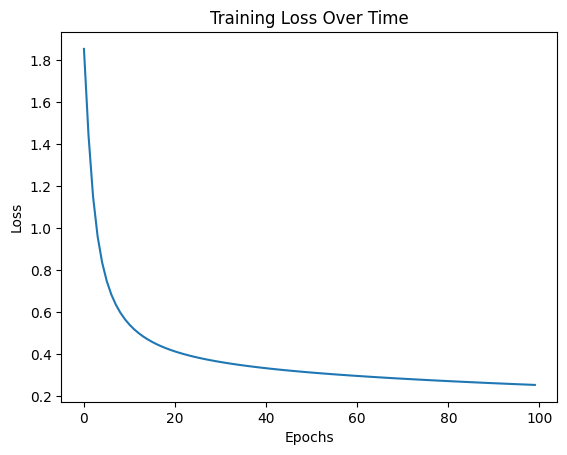

Model Accuracy: 92.90%


In [4]:
# Hyperparameters
learning_rate = 0.001  # Start with 0.001, adjust if needed
epochs = 100
batch_size = 64
loss_history = []

# Training Loop
for epoch in range(epochs):
    for i in range(0, m, batch_size):
        X_batch = X[i:i+batch_size]
        E_batch = E[i:i+batch_size]
        
        # Forward/Backprop
        Z1, A1, Z2, A2 = forwardpropagation(X_batch, W1, W2, B1, B2)
        W1, W2, B1, B2 = backpropagation(W1, W2, B1, B2, X_batch, E_batch, A1, A2, Z1, Z2, learning_rate)
    
    # Track loss every epoch (optional: every 10 epochs)
    _, _, _, A2_full = forwardpropagation(X, W1, W2, B1, B2)
    loss = entropy_loss(A2_full, E)
    loss_history.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Plotting
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

# Accuracy Check
_, _, _, final_prediction = forwardpropagation(X, W1, W2, B1, B2)
predicted_label = np.argmax(final_prediction, axis=1)
true_labels = Y  # No need for one-hot decode; Y is already labels
accuracy = np.mean(predicted_label == true_labels) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

In [5]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardpropagation(X, W1, W2, b1, b2)
    predictions = np.argmax(A2, axis=1)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X[index].reshape((28, 28)) * 255
    prediction = make_predictions(X[index].reshape(1, -1), W1, b1, W2, b2)
    label = Y[index]

    print("Prediction: ", prediction[0])
    print("Label: ", label)

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  0
Label:  0


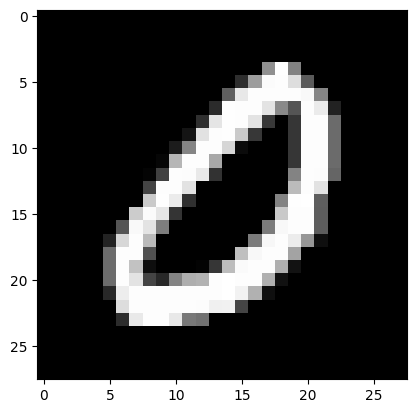

In [6]:
test_prediction(17, W1, B1, W2, B2)

